In [2]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=85e8a84de0a6c967b4380b37d00ac8e7dabd70d86d1e91010dc1074d29d26357
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [3]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/GeneralMills/pytrends to /tmp/pip-req-build-ye7wixhe
  Running command git clone -q https://github.com/GeneralMills/pytrends /tmp/pip-req-build-ye7wixhe
  Created wheel for pytrends: filename=pytrends-4.7.4-py3-none-any.whl size=16288 sha256=c2a8876a24d80ca39ea047cf47fd8ba0ea0dbbef7a3ff7cfafb1793be588c10a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwi8pace/wheels/c1/65/c5/60688c4521e16561ac09af949eb432957b257dfda14c4fe516
Successfully built pytrends


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from pytrends import dailydata
import seaborn as sns
import datetime
from google.colab import files
from tqdm import tqdm
import time
import numpy as np
from statistics import mean
import matplotlib.ticker as ticker

In [5]:
%matplotlib inline
sns.set_theme(style="whitegrid")

Заметки:

GAL2, IMX1 - только такой запрос

Просмотреть вручную: CRV, ALGO, SXP, FLEX, BTG, FLEX, NFT1, GMT3, ANC1, MIR1

USDC1, CNC, MIR1, WFTM - нет информации (убираем)

In [ ]:
# reading the coins names
uploaded = files.upload()

Saving GT_Weekly_full.csv to GT_Weekly_full.csv


In [ ]:
coins = pd.read_csv("coins.csv")
coins = [coins["Coin"][coin] for coin in range(len(coins)) if coins["Stablecoin"][coin] == 0]
coins = [coin.replace('-USD', '') for coin in coins]

In [ ]:
# remove coins without a history of requests
coins = set(coins)
coins.remove('USDC1')
coins.remove('GAL2')
coins.remove('IMX1')
coins.remove('GMT3')
coins.remove('ANC1')
coins.remove('UNI1')
coins.remove('XCN')
coins.remove('MIR1')

In [ ]:
coins = list(coins)

In [ ]:
len(coins)

87

In [ ]:
pytrend = TrendReq()
kw_lst = ['IMX1']

pytrend.build_payload(kw_list=kw_lst, cat=0, 
                               timeframe=f'2015-01-01 2021-12-31', geo='')
    
tmp_df = pytrend.interest_over_time()
related_queries = pytrend.related_queries()
queries = related_queries.values()
queries = list(queries)
queries = queries[0]['top']

In [ ]:
# extract related_queries

coin_df = pd.DataFrame()
queries_df = pd.DataFrame()
pytrend = TrendReq()
col = 0
col1 = 0

# provide your search terms
coins_tmp = coins[50:]
for coin in tqdm(coins_tmp):
    kw_lst = [coin+' crypto']

    pytrend.build_payload(kw_list=kw_lst, cat=0, 
                               timeframe=f'2015-01-01 2021-12-31', geo='')
    
    tmp_df = pytrend.interest_over_time()
    tmp_df = tmp_df[[coin+ ' crypto']]

    coin_df.insert(col, coin, tmp_df)

    related_queries = pytrend.related_queries()

    queries = related_queries.values()
    queries = list(queries)
    queries = queries[0]['top']

    queries_df.insert(col1, f'{coin}_query', queries['query'])
    queries_df.insert(col1+1, f'{coin}_value', queries['value'])

    col += 1
    col1 += 2

    time.sleep(5)
coin_df.index = tmp_df.index

  0%|          | 0/37 [00:00<?, ?it/s]

DOT


  3%|▎         | 1/37 [00:05<03:31,  5.88s/it]

XRP


  5%|▌         | 2/37 [00:11<03:19,  5.71s/it]

NEO


  8%|▊         | 3/37 [00:17<03:13,  5.70s/it]

AXS


 11%|█         | 4/37 [00:22<03:07,  5.67s/it]

QTUM


 14%|█▎        | 5/37 [00:28<03:01,  5.66s/it]

GALA


 16%|█▌        | 6/37 [00:34<02:55,  5.66s/it]

MANA


 19%|█▉        | 7/37 [00:39<02:50,  5.67s/it]

SNX


 22%|██▏       | 8/37 [00:45<02:44,  5.66s/it]

BNB


 24%|██▍       | 9/37 [00:51<02:38,  5.67s/it]

NEAR


 27%|██▋       | 10/37 [00:56<02:33,  5.67s/it]

LRC


 30%|██▉       | 11/37 [01:02<02:26,  5.63s/it]

CRV


 32%|███▏      | 12/37 [01:07<02:20,  5.62s/it]

LTC


 35%|███▌      | 13/37 [01:13<02:15,  5.64s/it]

DYDX


 38%|███▊      | 14/37 [01:19<02:09,  5.63s/it]

OMG


 41%|████      | 15/37 [01:24<02:02,  5.57s/it]

TRX


 43%|████▎     | 16/37 [01:30<01:57,  5.61s/it]

FTM


 46%|████▌     | 17/37 [01:35<01:52,  5.62s/it]

ALICE


 49%|████▊     | 18/37 [01:41<01:46,  5.63s/it]

WBNB


 51%|█████▏    | 19/37 [01:47<01:41,  5.62s/it]

KAVA


 54%|█████▍    | 20/37 [01:52<01:34,  5.59s/it]

KSM


 57%|█████▋    | 21/37 [01:58<01:28,  5.56s/it]

SXP


 59%|█████▉    | 22/37 [02:03<01:23,  5.58s/it]

TRY


 62%|██████▏   | 23/37 [02:09<01:17,  5.56s/it]

KNC


 65%|██████▍   | 24/37 [02:14<01:12,  5.54s/it]

FLEX


 68%|██████▊   | 25/37 [02:20<01:06,  5.56s/it]

MATIC


 70%|███████   | 26/37 [02:26<01:01,  5.60s/it]

ADA


 73%|███████▎  | 27/37 [02:31<00:56,  5.63s/it]

FIL


 76%|███████▌  | 28/37 [02:37<00:50,  5.59s/it]

POWR


 78%|███████▊  | 29/37 [02:42<00:44,  5.59s/it]

BAT


 81%|████████  | 30/37 [02:48<00:39,  5.59s/it]

XTZ


 84%|████████▍ | 31/37 [02:54<00:33,  5.57s/it]

WAVES


 86%|████████▋ | 32/37 [02:59<00:27,  5.60s/it]

BSV


 89%|████████▉ | 33/37 [03:05<00:22,  5.61s/it]

XLM


 92%|█████████▏| 34/37 [03:10<00:16,  5.61s/it]

BETA


 95%|█████████▍| 35/37 [03:16<00:11,  5.60s/it]

EOS


 97%|█████████▋| 36/37 [03:22<00:05,  5.63s/it]

ZIL


100%|██████████| 37/37 [03:27<00:00,  5.62s/it]


In [ ]:
queries_df.shape

(25, 74)

Collect all of the daily SVI data you need in 90 days increments

In [ ]:
coins_name = pd.read_csv('related_queries_final.csv')

In [ ]:
coins_name

,BCH,WBNB,ETH,XLM,C98,JASMY,AVAX,SHIB,KRW,XRP,...,MKR,TRY,DASH,SAND,XMR,AAVE,JST,DAR,REP,ICP
0,bch btc,wbnb coin,eth btc,xlm price,c98 coin,coin jasmy,avax coin,shib coin,usd krw,xrp price,...,MKR crypto,TRY crypto,DASH crypto,SAND crypto,XMR crypto,AAVE crypto,JST coin,DAR crypto,REP crypto,ICP crypto
1,bch price,wbnb to bnb,eth to usd,xlm coin,c98 price,jasmy price,avax yorum,shib price,usd to krw,xrp news,...,mkr crypto price,usd try,dash crypto price,sand crypto price,monero,aave crypto price,JST crypto,dar crypto price,rep coin,icp crypto price
2,bch bitcoin,wbnb price,eth price,stellar xlm,c98 binance,jasmy crypto,avax price,shib coin price,krw sgd,ripple xrp,...,mkr price,try coin,dash price,sand price,monero crypto,aave price,jst coin price,dar coin,augur rep,icp price
3,bch usd,wbnb crypto,eth usd,stellar,c98 crypto,jasmy coin price,avax coin yorum,shib crypto,currency krw,ripple,...,mkr coin,try coin yorum,dash coin,sand coin,monero xmr,aave coin,just coin,dalarnia crypto,augur crypto,icp crypto prediction


In [ ]:
start = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-31", "%Y-%m-%d")
date_generated = pd.date_range(start, end)


In [ ]:
coins_name

,BCH,WBNB,ETH,XLM,C98,JASMY,AVAX,SHIB,KRW,XRP,...,MKR,TRY,DASH,SAND,XMR,AAVE,JST,DAR,REP,ICP
0,bch btc,wbnb coin,eth btc,xlm price,c98 coin,coin jasmy,avax coin,shib coin,usd krw,xrp price,...,MKR crypto,TRY crypto,DASH crypto,SAND crypto,XMR crypto,AAVE crypto,JST coin,DAR crypto,REP crypto,ICP crypto
1,bch price,wbnb to bnb,eth to usd,xlm coin,c98 price,jasmy price,avax yorum,shib price,usd to krw,xrp news,...,mkr crypto price,usd try,dash crypto price,sand crypto price,monero,aave crypto price,JST crypto,dar crypto price,rep coin,icp crypto price
2,bch bitcoin,wbnb price,eth price,stellar xlm,c98 binance,jasmy crypto,avax price,shib coin price,krw sgd,ripple xrp,...,mkr price,try coin,dash price,sand price,monero crypto,aave price,jst coin price,dar coin,augur rep,icp price
3,bch usd,wbnb crypto,eth usd,stellar,c98 crypto,jasmy coin price,avax coin yorum,shib crypto,currency krw,ripple,...,mkr coin,try coin yorum,dash coin,sand coin,monero xmr,aave coin,just coin,dalarnia crypto,augur crypto,icp crypto prediction


In [ ]:
coins = list(coins_name.columns)

In [ ]:
len(coins)

82

In [ ]:
idx = coins.index('TRX')
idx

39

In [ ]:
data_daily_df5 = pd.DataFrame(date_generated, columns=['date'])
pytrend = TrendReq()

coins = coins[70:]

year_lst = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
month_day = [('01', '01'), ('04', '01'), ('04', '02'), ('07', '01'), ('07', '02'), ('10', '01'), ('10', '02'), ('12', '31')]

for coin in tqdm(coins):
    kw_lst = list(coins_name[coin])
    coin_df = pd.DataFrame()
    for year in year_lst:
        for i in range(0, len(month_day), 2):
            # print(f'{year}-{month}-{day}')
            pytrend.build_payload(kw_lst, cat=0, 
                               timeframe=f'{year}-{month_day[i][0]}-{month_day[i][1]} {year}-{month_day[i+1][0]}-{month_day[i+1][1]}')
            tmp_df = pytrend.interest_over_time()
            tmp_df = tmp_df.reset_index()
            
            coin_df = coin_df.append(tmp_df, ignore_index=True)
        time.sleep(5)
    coin_df = coin_df.drop(['isPartial'], axis=1)
    # data_daily_df = pd.concat(data_daily_df, coin_df, axis=0)
    # data_daily_df = data_daily_df.join(coin_df)
    data_daily_df5 = pd.merge(data_daily_df5, coin_df, how='outer', on='date')


100%|██████████| 12/12 [08:48<00:00, 44.01s/it]


In [ ]:
data_daily_df5


,date,RSR crypto,rsr crypto price,rsr price,rsr coin,LUNA crypto,terra luna crypto,terra luna,luna crypto price,MKR crypto,...,dar coin,dalarnia crypto,REP crypto,rep coin,augur rep,augur crypto,ICP crypto,icp crypto price,icp price,icp crypto prediction
0,2015-01-01,0,0,0,0,0,0,40,0,0,...,57,0,0,0,0,0,0,0,0,0
1,2015-01-02,0,0,0,0,0,0,21,0,0,...,0,0,0,29,0,0,0,0,0,0
2,2015-01-03,0,0,0,0,0,0,39,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04,0,0,0,0,0,0,33,0,0,...,51,0,0,0,0,0,0,0,0,0
4,2015-01-05,0,0,0,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,0,0,0,7,40,7,64,7,0,...,3,0,0,35,0,35,42,8,42,4
2553,2021-12-28,0,0,0,4,29,7,61,6,4,...,2,0,0,0,0,34,30,4,23,4
2554,2021-12-29,0,0,4,7,28,7,49,7,8,...,1,0,0,0,0,35,31,8,31,4
2555,2021-12-30,0,0,2,0,25,6,60,6,0,...,0,0,0,0,0,0,20,0,44,0


In [ ]:
data_daily_df5.to_csv('GT_daily5.csv')

In [ ]:
# Join all data in on dataset
GT_daily = pd.read_csv('GT_daily1.csv', index_col=None)
GT_daily2 = pd.read_csv('GT_daily2.csv', index_col=None)
GT_daily3 = pd.read_csv('GT_daily3.csv', index_col=None)
GT_daily4 = pd.read_csv('GT_daily4.csv', index_col=None)
GT_daily5 = pd.read_csv('GT_daily5.csv', index_col=None)

In [ ]:
GT_daily

,Unnamed: 0,date,bch btc,bch price,bch bitcoin,bch usd,wbnb coin,wbnb to bnb,wbnb price,wbnb crypto,...,btc to usd,btc price,doge coin,doge price,dogecoin,doge yorum,ltc usd,ltc btc,ltc price,usd to ltc
0,0,2015-01-01,0,57,0,0,NaN,NaN,NaN,NaN,...,35,11,6,2,60,0,0,36,33,0
1,1,2015-01-02,0,0,0,0,NaN,NaN,NaN,NaN,...,47,5,10,0,66,0,30,0,29,30
2,2,2015-01-03,0,0,0,0,NaN,NaN,NaN,NaN,...,29,8,7,6,59,0,64,33,60,0
3,3,2015-01-04,0,51,0,0,NaN,NaN,NaN,NaN,...,75,19,2,2,100,0,63,32,30,31
4,4,2015-01-05,0,0,0,0,NaN,NaN,NaN,NaN,...,45,22,5,2,90,0,27,55,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,2021-12-27,25,13,25,13,31.0,15.0,15.0,15.0,...,22,22,4,2,28,1,19,10,19,13
2553,2553,2021-12-28,44,25,31,37,15.0,30.0,0.0,15.0,...,25,24,3,1,26,1,34,26,23,17
2554,2554,2021-12-29,50,6,13,57,0.0,15.0,0.0,0.0,...,23,24,3,2,26,1,26,22,23,14
2555,2555,2021-12-30,20,46,20,26,16.0,32.0,0.0,16.0,...,24,24,3,2,27,0,40,21,22,27


In [ ]:
GT_daily = pd.merge(GT_daily, GT_daily2, how='outer', on='date')
GT_daily = pd.merge(GT_daily, GT_daily3, how='outer', on='date')
GT_daily = pd.merge(GT_daily, GT_daily4, how='outer', on='date')
GT_daily = pd.merge(GT_daily, GT_daily5, how='outer', on='date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
GT_daily = GT_daily.set_index('date')

In [ ]:
GT_daily = GT_daily.drop(GT_daily.columns[[0]], axis=1) 

In [ ]:
GT_daily.to_csv('GT_Daily_full.csv')

In [ ]:
GT_daily

,bch btc,bch price,bch bitcoin,bch usd,wbnb coin,wbnb to bnb,wbnb price,wbnb crypto,eth btc,eth to usd,...,dar coin,dalarnia crypto,REP crypto,rep coin,augur rep,augur crypto,ICP crypto,icp crypto price,icp price,icp crypto prediction
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0,57,0,0,NaN,NaN,NaN,NaN,0,0,...,57,0,0,0,0,0,0,0,0,0
2015-01-02,0,0,0,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,29,0,0,0,0,0,0
2015-01-03,0,0,0,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-04,0,51,0,0,NaN,NaN,NaN,NaN,0,0,...,51,0,0,0,0,0,0,0,0,0
2015-01-05,0,0,0,0,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,25,13,25,13,31.0,15.0,15.0,15.0,22,63,...,3,0,0,35,0,35,42,8,42,4
2021-12-28,44,25,31,37,15.0,30.0,0.0,15.0,24,60,...,2,0,0,0,0,34,30,4,23,4
2021-12-29,50,6,13,57,0.0,15.0,0.0,0.0,19,70,...,1,0,0,0,0,35,31,8,31,4


Weekly SVI

In [ ]:
start = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-31", "%Y-%m-%d")
date_generated = pd.date_range(start, end, freq='W')

In [ ]:
coins = list(coins_name.columns)

In [ ]:
idx = coins.index('GALA')
idx

29

In [ ]:
len(coins)

82

### Weekly SVI

In [ ]:
# weekly SVI
# data_weekly_df = pd.DataFrame(date_generated, columns=['date'])
pytrend = TrendReq()

# coins name (columns)
coins = coins[60:]

year_lst = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
# month_day = [('01', '01'), ('07', '01'), ('07', '02'), ('12', '31')]

for coin in tqdm(coins):
    kw_lst = list(coins_name[coin])
    coin_df = pd.DataFrame()
    for year in year_lst:
        # print(f'{year}-{month}-{day}')
        pytrend.build_payload(kw_lst, cat=0, 
                              timeframe=f'{year}-01-01 {year}-12-31')
        tmp_df = pytrend.interest_over_time()
        tmp_df = tmp_df.reset_index()
            
        coin_df = coin_df.append(tmp_df, ignore_index=True)
        time.sleep(4)
    coin_df = coin_df.drop(['isPartial'], axis=1)
    # data_daily_df = pd.concat(data_daily_df, coin_df, axis=0)
    # data_daily_df = data_daily_df.join(coin_df)
    data_weekly_df = pd.merge(data_weekly_df, coin_df, how='outer', on='date')

100%|██████████| 22/22 [10:45<00:00, 29.35s/it]


In [ ]:
data_weekly_df.to_csv('GT_weekly4.csv')

In [ ]:
len(data_weekly_df.columns)

333

In [ ]:
GT_Weekly = pd.read_csv('GT_weekly1.csv')
GT_Weekly1 = pd.read_csv('GT_weekly7.csv')
GT_Weekly = pd.merge(GT_Weekly, GT_Weekly1, how='outer', on='date')

In [ ]:
GT_Weekly = GT_Weekly.set_index('date')

In [ ]:
GT_Weekly = GT_Weekly.drop(GT_Weekly.columns[[0]], axis=1) 

In [ ]:
GT_weekly = pd.read_csv('GT_Weekly_full.csv', index_col=0)
GT_daily = pd.read_csv('GT_Daily_full.csv', index_col=0)

In [ ]:
shape = GT_weekly.shape

In [ ]:
shape[0]

2557

In [ ]:
coins_name = pd.read_csv('related_queries_final.csv')
coins = list(coins_name.columns)

### Formation of a dataset

Algorithm:

Calculate average SVI

Divide the average weekly SVI by the daily SVI

Calculate adjoint coefficient

Multiply the daily SVI by adjoint coefficient

Normalize the found SVI within 0 .. 100

In [ ]:
weekly_data = pd.read_csv('GT_weekly_full.csv', index_col=0)
daily_data = pd.read_csv('GT_Daily_full.csv', index_col=0)

In [ ]:
coins_name = pd.read_csv('related_queries_final.csv')
coins = list(coins_name.columns)

In [ ]:
def avg_SVI(df, coins):
    # columns = df.columns
    shape = df.shape
    num_col = 4
    coin_num = 0

    avg_df = pd.DataFrame()

    for i in range(0, shape[1], 4):
        tmp_df = df.iloc[:, i:i+num_col]
        # print(tmp_df)

        avg_df[coins[coin_num]] = tmp_df.mean(axis=1)
        # tmp_df[f'avg_{coins[coin_num]}'] = tmp_df.mean(axis=1)
        coin_num += 1
    
    return avg_df

In [ ]:
avg_daily_df = avg_SVI(daily_data, coins)
avg_weekly_df = avg_SVI(weekly_data, coins)

In [ ]:
def adj_SVI(avg_daily, avg_weekly):
    res_df = pd.DataFrame()
    columns = avg_daily.columns

    for coin in columns:
        tmp_df = pd.DataFrame(avg_daily[coin], index=avg_daily.index)
        tmp_df2 = pd.DataFrame(avg_weekly[coin], index=avg_weekly.index)
        # tmp_df = pd.concat([tmp_df, tmp_df2], axis=1)

        tmp_df = tmp_df.join(
            tmp_df2, 
            on=['date'], 
            how="outer", 
            lsuffix="_d", 
            rsuffix="_w"
        )
        
        # afjustment factor 
        tmp_df[f'{coin}_adj_factor'] = tmp_df[f'{coin}_w'] / tmp_df[f'{coin}_d']
        # inf->1
        tmp_df.replace([np.inf, -np.inf], 1, inplace=True)

        tmp_df[f'{coin}_adj_factor'][0:3] = 1

        for i in range(3, len(tmp_df), 7):
            coef = tmp_df[f'{coin}_adj_factor'][i]
            for j in range(1, 7):
                if i+j == len(tmp_df):
                    break;
                tmp_df[f'{coin}_adj_factor'][i+j] = coef

        # adjustment svi
        tmp_df[f'{coin}_adj_svi'] = tmp_df[f'{coin}_d'] * tmp_df[f'{coin}_adj_factor']
        
        res_df = pd.concat([res_df, tmp_df[f'{coin}_adj_svi']], axis=1)
    return res_df

In [ ]:
GT_adj = adj_SVI(avg_daily_df, avg_weekly_df)

In [ ]:
# NaNs->0
GT_adj = GT_adj.fillna(0)

# normalization
GT_adj = GT_adj.apply(lambda iterator: ((iterator - iterator.min())/(iterator.max() - iterator.min()) * 100))

In [25]:
GT_adj.to_csv('GT_adj.csv')

In [ ]:
GT_adj.describe()

,BCH_adj_svi,WBNB_adj_svi,ETH_adj_svi,XLM_adj_svi,C98_adj_svi,JASMY_adj_svi,AVAX_adj_svi,SHIB_adj_svi,KRW_adj_svi,XRP_adj_svi,...,MKR_adj_svi,TRY_adj_svi,DASH_adj_svi,SAND_adj_svi,XMR_adj_svi,AAVE_adj_svi,JST_adj_svi,DAR_adj_svi,REP_adj_svi,ICP_adj_svi
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,...,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1.931409,0.795831,8.063820,12.513504,0.097353,0.311276,0.540232,1.550826,22.908966,10.415628,...,1.947869,5.790529,7.620946,7.694568,14.267508,2.498043,8.956986,0.814100,3.128653,0.728235
std,3.838120,4.874296,7.627846,7.214152,2.175460,2.858679,2.831780,5.508846,12.127934,8.591168,...,5.559354,5.161200,5.946417,4.778810,11.532450,6.812480,7.646006,2.716335,6.468148,3.090077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.399403,7.223440,0.000000,0.000000,0.000000,0.000000,13.706818,3.923866,...,0.000000,2.663480,3.575895,5.381443,5.391687,0.000000,4.660590,0.000000,0.000000,0.000000
50%,1.260294,0.000000,6.371126,12.972973,0.000000,0.000000,0.000000,0.000000,21.190144,10.053350,...,0.000000,4.745046,6.356191,7.307524,12.730917,0.000000,7.218750,0.000000,1.518961,0.000000
75%,2.516281,0.000000,10.669620,16.663385,0.000000,0.000000,0.000000,0.000000,30.118989,15.426448,...,2.045827,7.370880,9.730784,9.462371,18.891637,2.955911,10.638158,0.000000,3.456945,0.988543
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
gt_full = pd.read_csv('GT_adj.csv', index_col=0)

In [7]:
gt_full

,BCH_adj_svi,WBNB_adj_svi,ETH_adj_svi,XLM_adj_svi,C98_adj_svi,JASMY_adj_svi,AVAX_adj_svi,SHIB_adj_svi,KRW_adj_svi,XRP_adj_svi,...,MKR_adj_svi,TRY_adj_svi,DASH_adj_svi,SAND_adj_svi,XMR_adj_svi,AAVE_adj_svi,JST_adj_svi,DAR_adj_svi,REP_adj_svi,ICP_adj_svi
2015-01-01,1.113173,0.000000,0.000000,7.859752,0.000000,0.000000,0.000000,0.000000,15.278014,13.046472,...,0.000000,3.092220,6.553404,5.041237,10.461675,0.000000,2.187500,3.605769,0.000000,0.000000
2015-01-02,0.000000,0.000000,0.000000,8.677867,0.000000,0.000000,0.000000,0.000000,23.003063,14.444876,...,0.000000,2.309303,6.271031,4.855670,16.947141,7.746772,1.859375,0.000000,1.518961,0.000000
2015-01-03,0.000000,0.000000,0.000000,8.473338,0.000000,0.000000,0.000000,0.000000,11.873756,16.367681,...,0.000000,1.526386,6.741652,3.000000,9.535180,0.000000,2.953125,0.000000,0.000000,0.000000
2015-01-04,0.995996,0.000000,0.000000,13.382031,0.000000,0.000000,0.000000,0.000000,18.813206,15.843280,...,0.000000,4.745046,7.400522,7.731959,20.653122,0.000000,7.984375,1.644737,0.000000,0.000000
2015-01-05,0.000000,0.000000,0.000000,13.704732,0.000000,0.000000,0.000000,0.000000,16.203423,13.368882,...,0.000000,7.775226,7.165212,8.310175,22.254472,0.000000,6.843750,0.000000,0.000000,0.751237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.233374,12.558870,13.142262,12.647242,0.306639,6.238106,4.516750,3.330601,24.396920,5.187734,...,0.000000,9.294666,6.427905,6.618557,18.076583,7.939991,7.109375,0.404858,1.539007,0.596022
2021-12-28,2.223319,9.914897,13.210005,9.233378,0.161933,4.366674,3.469388,2.497950,22.686504,5.238717,...,1.047463,9.042393,4.866139,5.347079,15.552986,6.517903,11.210938,0.202429,0.747518,0.378723
2021-12-29,2.044805,2.478724,14.768108,9.233378,0.072353,2.183337,3.600308,2.664480,11.782600,4.983800,...,5.237316,8.537846,5.312358,5.219931,16.700076,8.532527,7.109375,0.101215,0.769503,0.459434
2021-12-30,1.817604,10.575890,13.210005,8.182958,0.072353,5.614296,3.731228,2.831010,17.982859,4.677899,...,0.523732,9.799213,4.587252,4.584192,17.158911,5.569844,9.023438,0.000000,0.000000,0.397348


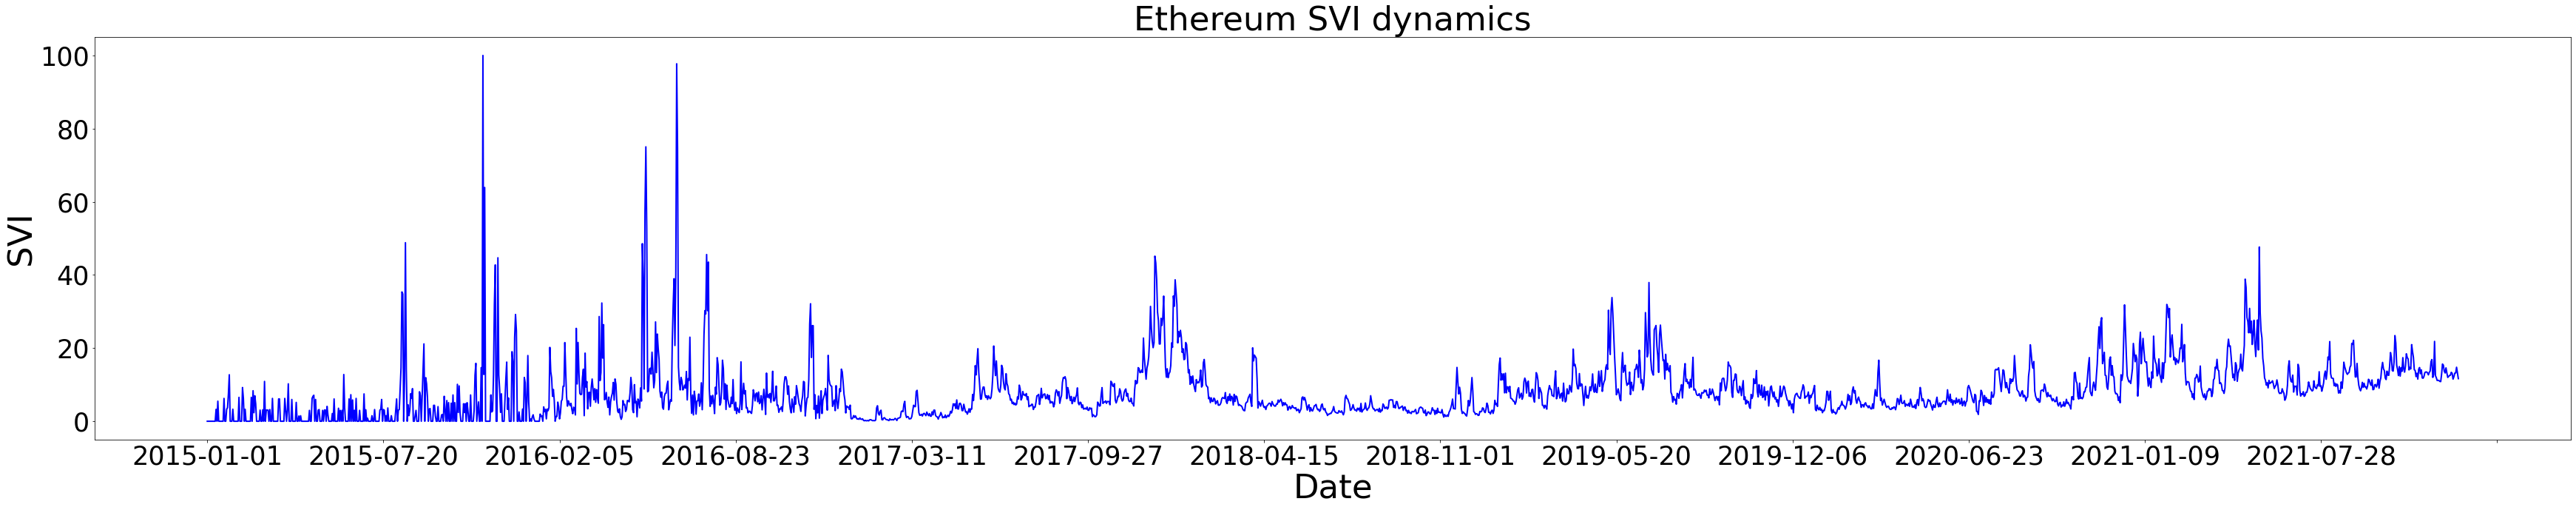

In [23]:
fig, ax = plt.subplots( figsize=(60, 10))

ax.plot(gt_full.index, gt_full['ETH_adj_svi'], linewidth = 2, color='blue')
ax.set_xlabel('Date', fontsize=45)
ax.set_ylabel('SVI', fontsize=45)
ax.set_title('Ethereum SVI dynamics', fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.tick_params(axis='both', which='major', labelsize=35)

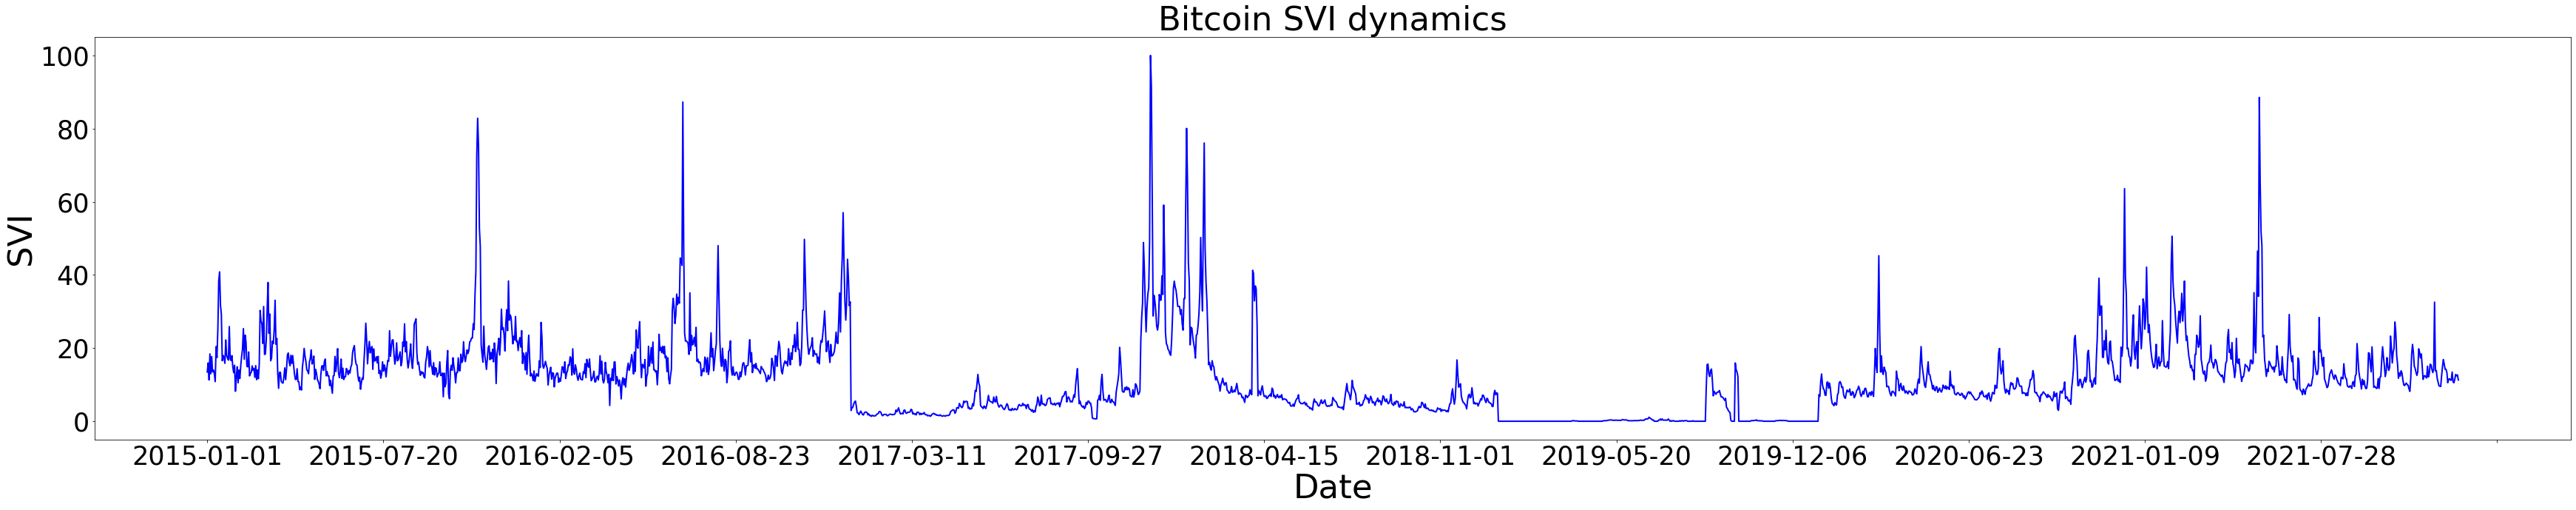

In [25]:
fig, ax = plt.subplots( figsize=(60, 10))

ax.plot(gt_full.index, gt_full['BTC_adj_svi'], linewidth = 2, color='blue')
ax.set_xlabel('Date', fontsize=45)
ax.set_ylabel('SVI', fontsize=45)
ax.set_title('Bitcoin SVI dynamics', fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.tick_params(axis='both', which='major', labelsize=35)

In [ ]:
plt.figure(figsize=(12, 7))

plt.xlabel('Date', fontsize=15)
plt.ylabel('SVI', fontsize=15)
plt.title('Ethereum SVI dynamics')
plt.plot(gt_full.index, gt_full['ETH_adj_svi'], linewidth = 1, color='blue')